In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
total_students = df.count()
print(total_students)

gender                         1000
race/ethnicity                 1000
parental_level_of_education    1000
lunch                          1000
test_preparation_course        1000
math_score                     1000
reading_score                  1000
writing_score                  1000
dtype: int64


In [12]:
males = df["gender"].loc[df["gender"] == "male"].count()
print("Total males are " + str(males))

Total males are 482


In [14]:
females = df["gender"].loc[df["gender"] == "female"].count()
print("Total females are " + str(females))

Total females are 518


In [16]:
common = df["parental_level_of_education"].value_counts()
print(common)

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [18]:
avg_math_score = df.groupby('gender')["math_score"].mean()
print(avg_math_score)

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64


In [20]:
avg_reading_score = df.groupby("test_preparation_course")["reading_score"].mean()
print(avg_reading_score)

test_preparation_course
completed    73.893855
none         66.534268
Name: reading_score, dtype: float64


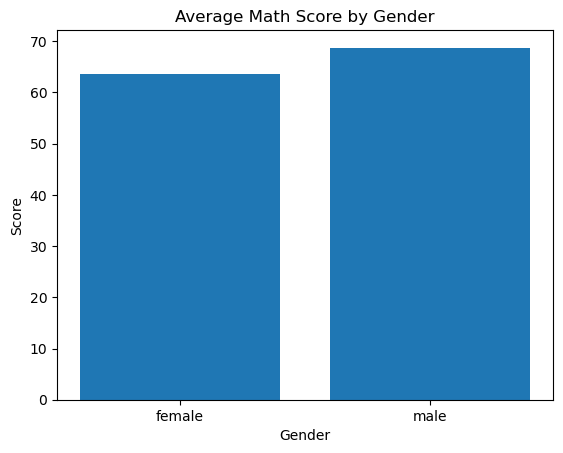

In [24]:
plt.bar(avg_math_score.index, avg_math_score.values)
plt.title("Average Math Score by Gender")
plt.ylabel("Score")
plt.xlabel("Gender")
plt.savefig("math_score_bar.png")  # or any name
plt.show()

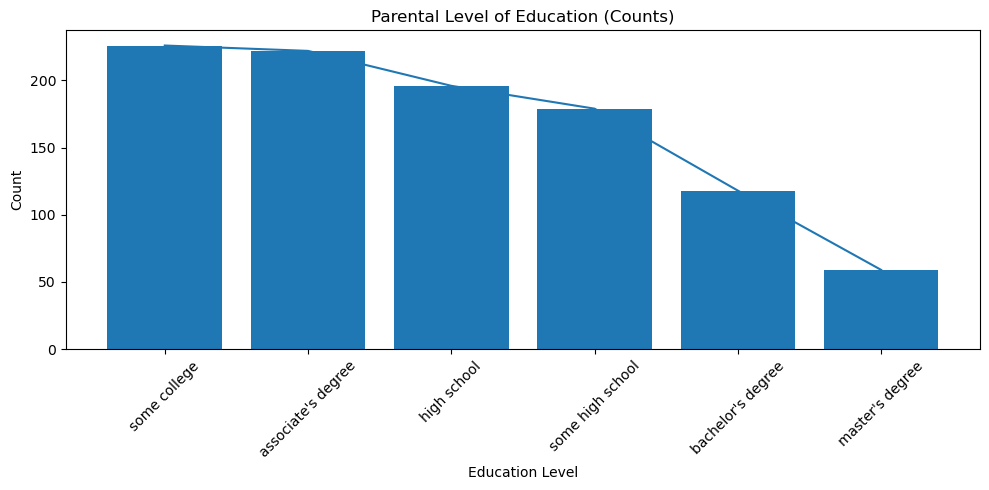

In [26]:
plt.figure(figsize=(10,5))
plt.bar(common.index, common.values)
plt.xticks(rotation=45)
plt.title("Parental Level of Education (Counts)")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.tight_layout()
plt.plot(common)
plt.savefig("parental_edu_bar.png")  # or any name
plt.show()

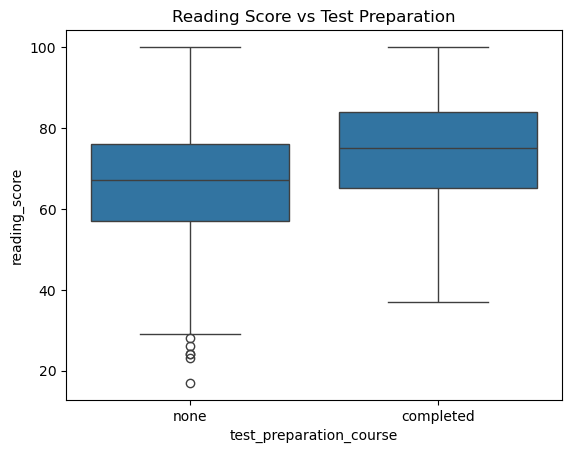

In [28]:
sns.boxplot(x="test_preparation_course", y="reading_score", data=df)
plt.title("Reading Score vs Test Preparation")
plt.savefig("score_prep_box.png")  # or any name
plt.show()